# Baseline Model 커널

In [204]:
# library import

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [205]:
path = '/Users/kengohirano/Desktop/Dacon/Dacon_competiton/2024.01.15/data/open/'

train = pd.read_csv(path + 'train.csv')
test = pd.read_csv(path + 'test.csv')

In [206]:
train.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A


In [207]:
train.select_dtypes('object').nunique()

ID        96294
대출기간          2
근로기간         16
주택소유상태        4
대출목적         12
대출등급          7
dtype: int64

In [208]:
def check(df , col):
    print(f"{col} Unique Values : \n {df[col].unique()}")

for col in ['대출기간' , '근로기간' , '주택소유상태' , '대출목적']:
    check(train , col)
    check(test , col)

대출기간 Unique Values : 
 [' 36 months' ' 60 months']
대출기간 Unique Values : 
 [' 36 months' ' 60 months']
근로기간 Unique Values : 
 ['6 years' '10+ years' '5 years' '8 years' 'Unknown' '9 years' '2 years'
 '1 year' '3 years' '7 years' '4 years' '< 1 year' '10+years' '<1 year'
 '3' '1 years']
근로기간 Unique Values : 
 ['8 years' '5 years' '6 years' 'Unknown' '10+ years' '3 years' '< 1 year'
 '1 year' '7 years' '4 years' '2 years' '9 years' '10+years' '<1 year' '3'
 '1 years']
주택소유상태 Unique Values : 
 ['RENT' 'MORTGAGE' 'OWN' 'ANY']
주택소유상태 Unique Values : 
 ['MORTGAGE' 'RENT' 'OWN']
대출목적 Unique Values : 
 ['부채 통합' '주택 개선' '주요 구매' '휴가' '의료' '자동차' '신용 카드' '소규모 사업' '기타' '이사' '주택'
 '재생 에너지']
대출목적 Unique Values : 
 ['주택 개선' '부채 통합' '신용 카드' '기타' '주요 구매' '이사' '휴가' '소규모 사업' '주택' '의료' '자동차'
 '재생 에너지' '결혼']


In [209]:
for v in test['대출목적'].unique():
    if v not in train['대출목적'].unique():
        print(f"{v} not in train data")

결혼 not in train data


In [210]:
# 근로기간 데이터 변경

category = ['< 1 year' , '10+years' , '<1 year' , '3' , '1 year']

train.loc[(train['근로기간'] == category[0]) | (train['근로기간'] == category[2]) | (train['근로기간'] == category[4]) , '근로기간'] = '1 years'
test.loc[(test['근로기간'] == category[0]) | (test['근로기간'] == category[2]) | (test['근로기간'] == category[4]) , '근로기간'] = '1 years'

train.loc[(train['근로기간'] == category[1]) , '근로기간'] = '10 years'
test.loc[(test['근로기간'] == category[1]) , '근로기간'] = '10 years'

train.loc[(train['근로기간'] == category[3]) , '근로기간'] = '3 years'
test.loc[(test['근로기간'] == category[3]) , '근로기간'] = '3 years'

In [211]:
test.loc[test['대출목적'] == '결혼' , '대출목적'] = '부채 통합'

In [212]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
train['대출기간'] = encoder.fit_transform(train['대출기간'])
test['대출기간'] = encoder.transform(test['대출기간'])

In [213]:
train['주택소유상태'] = encoder.fit_transform(train['주택소유상태'])
test['주택소유상태'] = encoder.transform(test['주택소유상태'])

In [214]:
print(f"Before Target Value Count \n {train['대출등급'].value_counts()}")
train['대출등급'] = encoder.fit_transform(train['대출등급'])
print(f"After Target Value Count \n {train['대출등급'].value_counts()}")


Before Target Value Count 
 대출등급
B    28817
C    27623
A    16772
D    13354
E     7354
F     1954
G      420
Name: count, dtype: int64
After Target Value Count 
 대출등급
1    28817
2    27623
0    16772
3    13354
4     7354
5     1954
6      420
Name: count, dtype: int64


In [215]:
mapp = {
    1 : 'B' ,
    2 : 'C' ,
    0 : 'A' ,
    3 : 'D' ,
    4 : 'E' ,
    5 : 'F' ,
    6 : 'G'
}

In [216]:
from category_encoders.target_encoder import TargetEncoder

for col in ['근로기간' , '대출목적']:
    te = TargetEncoder(cols = [col])
    train[col] = te.fit_transform(train[col] , train['대출등급'])
    test[col] = te.transform(test[col])

In [217]:
train['대출등급'] = train['대출등급'].map(mapp)

In [218]:
train.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,0,1.744192,3,72000000,18.90,15,1.850082,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,1,1.679880,1,130800000,22.33,21,1.658929,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,0,1.733098,1,96000000,8.60,14,1.850082,0,928644,151944.0,0.0,0.0,A


In [219]:
test.head(3)

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수
0,TEST_00000,16800000,0,1.752455,1,132000000,19.64,12,1.658929,0,394692,146604.0,0.0,0.0
1,TEST_00001,8400000,0,1.733098,3,89971200,15.84,25,1.850082,0,0,0.0,0.0,0.0
2,TEST_00002,17280000,0,1.744192,3,150000000,8.41,20,1.288163,0,1786980,281820.0,0.0,0.0


In [220]:
# 스케일링

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

cols = ['대출금액' , '연간소득' , '부채_대비_소득_비율' , '총상환원금' , '총상환이자' , '총연체금액']

data = train[cols]
idx = data.index ; columns = data.columns

data = scaler.fit_transform(data)
data = pd.DataFrame(data , index = idx , columns = columns)

train[cols] = data

data = test[cols]
idx = data.index ; columns = data.columns

data = scaler.transform(data)
data = pd.DataFrame(data , index = idx , columns = columns)

test[cols] = data

----------------------------------------------------------------------------------------------------
R2 Score
train data r2 : 1.0 
test data r2 : 0.7855548055454593
----------------------------------------------------------------------------------------------------
Confusion_matrix : 

Classficaiton Report :               precision    recall  f1-score   support

           A       0.88      0.82      0.85      3350
           B       0.80      0.85      0.82      5767
           C       0.76      0.86      0.81      5490
           D       0.72      0.65      0.68      2668
           E       0.74      0.59      0.65      1484
           F       0.71      0.45      0.55       407
           G       0.89      0.09      0.16        93

    accuracy                           0.79     19259
   macro avg       0.79      0.61      0.65     19259
weighted avg       0.79      0.79      0.78     19259



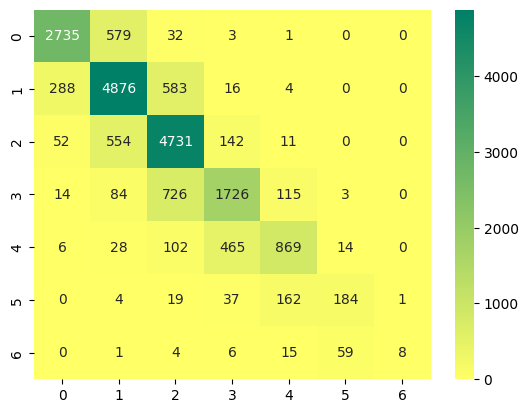

In [221]:
# 모델링

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.ensemble import RandomForestClassifier

target = train['대출등급']
train.drop(['ID' , '대출등급'] , axis = 1 , inplace = True)
test.drop(['ID'] , axis = 1 , inplace = True)

trainX , validX , trainY , validY = train_test_split(train , target , test_size = 0.2 , random_state = 13)

model = RandomForestClassifier()

model.fit(trainX , trainY)

print('-' * 100)
print("R2 Score")
print(f"train data r2 : {model.score(trainX , trainY)} \ntest data r2 : {model.score(validX , validY)}")
print('-' * 100)

valid_predict = model.predict(validX)
print("Confusion_matrix : \n")
sns.heatmap(
    confusion_matrix(validY , valid_predict) ,
    annot = True ,
    fmt = 'd' ,
    cmap = 'summer_r'
)
print(f"Classficaiton Report : {classification_report(validY , valid_predict)}")

In [222]:
submission = pd.read_csv(path + 'sample_submission.csv')

In [223]:
test_predict = model.predict(test)
test_predict

array(['B', 'B', 'A', ..., 'C', 'C', 'A'], dtype=object)

In [224]:
submission

,ID,대출등급
0,TEST_00000,G
1,TEST_00001,G
2,TEST_00002,G
3,TEST_00003,G
4,TEST_00004,G
...,...,...
64192,TEST_64192,G
64193,TEST_64193,G
64194,TEST_64194,G
64195,TEST_64195,G


In [225]:
submission['대출등급'] = test_predict
submission.to_csv(path + 'submission.csv' , index = False)